**Kapittel 1 - Innledning**

*Kandidatnummer* har fått i oppdrag av næringsminister Jan Christian Vestre å gjøre en samfunnsøkonomisk utredning av tiltak som kan gjøres for å innføre besøksbidrag for turisme. Det vi skal se videre på her er besøksbidrag i form av en turistskatt. Norge har i de siste tiårene opplevd en stor vekst i turisme, og regjeringen har gitt grønt lys for at kommuner kan innføre en turistskatt. Dette er en skatt som eksempelvis betales av overnattingsgjester i hoteller, leiligheter og lignende eller som betales i flybilletten til destinasjonen.

Grunnen til å innføre en slik skatt er for å kunne verne miljøet i kommunene som får ekstra stor belastning og bruk på grunn av overturisme. Turistskatt er en form for skatt som har vært innført allerede i flere andre land, og som idag brukes i for eksempel Nederland, Italia, Spania og Hellas.

Med innføring av en turistskatt er det meningen at etterspørselen skal bli lavere i høysesongene av turismen. Dette vil føre til at det blir mindre bruk og miljøbelastning på grunn av overturisme.

I kapittel 2 skal vi se nærmere på turistnæringen i Nord-Norge. I figurer skal vi nærmere se på hvordan hotellnattinger har utviklet seg over tid, hvilken tid på året som har mest turister, hvilke framkomstmidler turister bruker for å besøke Nord-Norge og hvilke overnattingsmetoder de bruker.

I kapittel 3 skal vi se nærmere på hvordan en turistskatt kan påvirke turistnæringen i Nord-Norge. Vi skal se på hvordan en turistskatt påvirker tilbud og etterspørsel etter hotellrom og flybilletter. Vi skal se på hvor stor effekt vi kan forvente av en turistskatt, og vi skal se på hvilke samfunnsøkonomiske konsekvenser turistskatten vil medbringe.

Kapittel 4 blir en sammenfatning av det vi har sett på i kapittel 2 og 3. Her skal vi konkludere med hvilke konsekvenser en turistskatt kommer til å ha for Nord-Norge.

**Kapittel 2 - Turistnæringen i Norge**

I denne utredningen skal vi fokusere mest på det arktiske Norge. Det arktiske Norge består av fylkene Nordland, Troms og Finnmark og øya Svalbard. Fra 2016 til 2022 har Nord-Norge hatt en oppgang i hotellkapasitet på litt over 10 prosent, mens svalbard har hatt en litt mindre økning på 4.4 prosent (se figur 1). Kapasitetsutnyttelsen både i Nord-Norge og Svalbard har vært mellom 40 og 50 prosent av alle hotellsenger til 2019 hvor det skjedde en nedgang i kapasitetsutnyttelsen på grunn av pandemien. I 2022 har kapasitetsutnyttelsen kommet tilbake til normalen.


In [1]:
# Importing all packages needed for the project
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from pyjstat import pyjstat
import matplotlib.ticker as ticker

In [2]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13153/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Senger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [3]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [4]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
svalbard_df = df[df['region'] == 'Svalbard']

# Making a copy of the dataset
svalbard_df= svalbard_df.copy()

# Converting the date to datetime
svalbard_df['year'] = pd.to_datetime(svalbard_df['year'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
svalbard_df = svalbard_df.groupby(svalbard_df['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
svalbard_df=svalbard_df.reset_index()

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df = pd.concat([nordland_df, troms_finnmark_df])

# Making a copy of the dataset
nord_norge_df= nord_norge_df.copy()

nord_norge_df['year'] = pd.to_datetime(nord_norge_df['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df = nord_norge_df.groupby(nord_norge_df['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df=nord_norge_df.reset_index()

In [5]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KapasitetSeng"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [6]:
# Fixing the dataset so M is replaced with -
df1['year'] =df1['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
svalbard_df1 = df1[df1['region'] == 'Svalbard']

# Making a copy of the dataset
svalbard_df1= svalbard_df1.copy()

# Converting the date to datetime
svalbard_df1['year'] = pd.to_datetime(svalbard_df1['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
svalbard_df1 = svalbard_df1.groupby(svalbard_df1['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
svalbard_df1=svalbard_df1.reset_index()

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df1 = df1[df1['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df1 = df1[df1['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df1 = pd.concat([nordland_df1, troms_finnmark_df1])

# Making a copy of the dataset
nord_norge_df1= nord_norge_df1.copy()

nord_norge_df1['year'] = pd.to_datetime(nord_norge_df1['year'], format='%Y-%m')

# Group the dataframe by year and summarize the yearly data and find the mean of the yearly data
nord_norge_df1 = nord_norge_df1.groupby(nord_norge_df1['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df1=nord_norge_df1.reset_index()

In [7]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13152/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc",
          "000"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df_1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [8]:
# Fixing the dataset so M is replaced with -
df_1['måned'] =df_1['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
norge = df_1[df_1['bustadland'] == 'Norge']

# Making a copy of the dataset
norge= norge.copy()

# Taking out the svalbard column and storing it in a new dataset
utlandet = df_1[df_1['bustadland'] == 'Utlandet i alt']

# Making a copy of the dataset
utlandet= utlandet.copy()

# Converting the date to datetime
norge['year'] = pd.to_datetime(norge['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
norge = norge.groupby(norge['year'].dt.year).agg({
    'value': 'sum'
})

# Fixing so the first column is not the index
norge=norge.reset_index()

# Converting the date to datetime
utlandet['year'] = pd.to_datetime(utlandet['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
utlandet = utlandet.groupby(utlandet['year'].dt.year).agg({
    'value': 'sum'
})

# Fixing so the first column is not the index
utlandet=utlandet.reset_index()

# Putting the two datasets together
total = pd.concat([utlandet, norge])

# aggregate the data by year and sum the values
total = total.groupby('year').agg({'value': 'sum'})

# Fixing so the first column is not the index
total=total.reset_index()

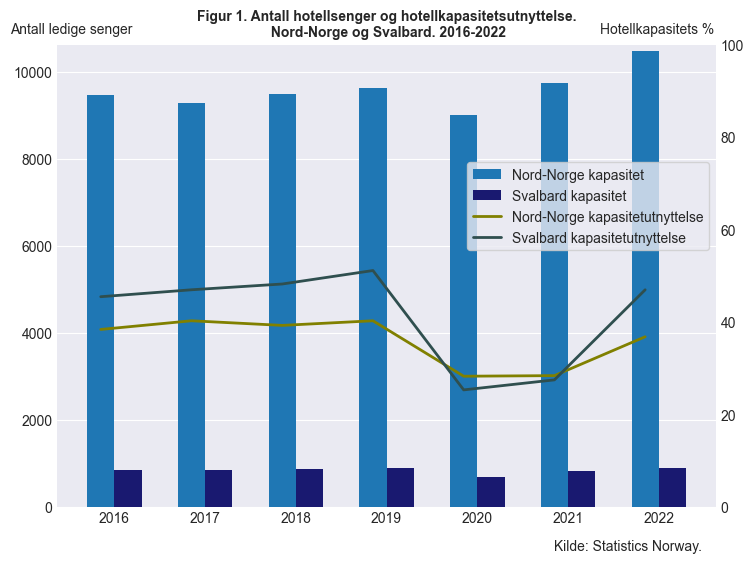

In [9]:
# Setting the style for the plots
plt.style.use('seaborn-v0_8-dark')

# Plotting the data
fig, ax = plt.subplots( figsize=(8.5,6))

# Calculating the width of the bars
width = 0.3

# np.arange to create the x-axis years
x_p = np.arange(len(nord_norge_df['year']))

# For loop to create the x-axis years for the second bar
x_d = [x + width for x in x_p]

# Plotting first bar
ax.bar(x_p,nord_norge_df['value'], width=width, label='Nord-Norge kapasitet', color='#1f77b4') # have to put width=width to make sure the bars are next to each other

# Plot the second bar
ax.bar(x_d, svalbard_df['value'], width=width, label='Svalbard kapasitet', color='midnightblue')

# Calculating the position of the tick labels to make the plot centered
ticks_pos = x_p + width/2

# Setting the x_ticks to the position of the tick labels
ax.set_xticks(ticks_pos)

# Setting label for the x_ticks, and making sure the x_ticks are strings to remove decimals
ax.set_xticklabels(nord_norge_df['year'].astype("string"))

# Set the title and labels
ax.set_title('Figur 1. Antall hotellsenger og hotellkapasitetsutnyttelse.\n Nord-Norge og Svalbard. 2016-2022', fontsize=10, fontweight='bold')

# Fixing the grid
ax.grid(axis='y')

# Caption
ax.text(5, -1000, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(5.5, 10900, 'Hotellkapasitets %', fontsize=10)
ax.text(-1, 10900, 'Antall ledige senger', fontsize=10)

# Fixing max y value
ax.set_ylim(0, 10630)

# Making a second y-axis
ax2 = ax.twinx()

# Plotting the data for the second y-axis, using astype to make sure the x-axis is a string for not having decimals
ax2.plot(nord_norge_df1['year'].astype('string'),nord_norge_df1['value'],color="olive", label = "Nord-Norge kapasitetutnyttelse", lw=2)
ax2.plot(svalbard_df1['year'].astype('string'), svalbard_df1["value"],color="darkslategrey", label = "Svalbard kapasitetutnyttelse", lw=2)

# Setting the y-axis limit for percentage
ax2.set_ylim(0, 100)

#  Fixing the legend together for both y-axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(0.5, 0.4, 0.5, 0.5), frameon=True);

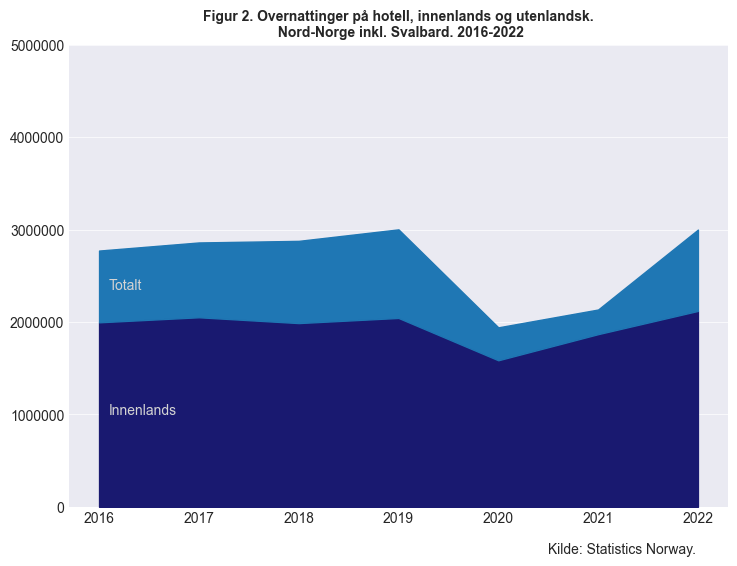

In [10]:
# Plotting the data
fig, ax1 = plt.subplots( figsize=(8.5,6))
# Plotting the data
ax1.plot(total['year'].astype("string"), total['value'], color='#1f77b4', linewidth=0.01)
ax1.plot(norge['year'].astype("string"), norge['value'], color='midnightblue', linewidth=0.01)

#Setting the title
ax1.set_title('Figur 2. Overnattinger på hotell, innenlands og utenlandsk.\n Nord-Norge inkl. Svalbard. 2016-2022', fontsize=10, fontweight='bold')

# Source
ax1.text(x=4.5, y=-500000, s='Kilde: Statistics Norway.', fontsize=10)

# Fixing the y-axis so that it is not in scientific notation
ax1.ticklabel_format(axis='y', style='plain')

#Fixing so it goes from 0 to 5 million
ax1.set_ylim(0, 5000000)

# Setting grid
ax1.grid(axis='y', alpha=0.7)

# Adding labels
ax1.text(x=0.1, y=2350000, s='Totalt', fontsize=10, color='lightgrey')
ax1.text(x=0.1, y=1000000, s='Innenlands', fontsize=10, color='lightgrey')

# Filling the area with colors
ax1.fill_between(norge['year'].astype("string"), norge['value'],y2=0, color='midnightblue')
ax1.fill_between(total['year'].astype("string"), total['value'],y2=norge['value'], color='#1f77b4');

Turister sto for 776000 hotellovernattinger i Nord-Norge inkl. Svalbard i 2016 og hadde en topp på over 958000 overnattinger i 2019. På grunn av pandemien med covid-restriksjoner overnattet det kun 266000 turister i 2021. Etter pandemien har tallene tatt seg opp igjen og i 2022 sto turister for litt over 41 prosent av overnattingene i Nord-Norge inkl. Svalbard.  


In [11]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/09266/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20",
          "21"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "SUMRL"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [12]:
# Pivoting the dataframe
pivot = pd.pivot_table(df, index='år', columns='region', values='value')

# renaming the columns
pivot.columns = [col.split(" - ")[0] for col in pivot.columns]

# resetting the index
pivot = pivot.reset_index()

#Deleting the first row to start the timeseries from 2013 since 2012 is missing
pivot = pivot.iloc[1:]

In [13]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "PrisRom"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [14]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
svalbard_df2 = df[df['region'] == 'Svalbard']

# Making a copy of the dataset
svalbard_df2= svalbard_df2.copy()

# Converting the date to datetime
svalbard_df2['year'] = pd.to_datetime(svalbard_df2['year'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
svalbard_df2 = svalbard_df2.groupby(svalbard_df2['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
svalbard_df2=svalbard_df2.reset_index()

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df2 = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df2 = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df2 = pd.concat([nordland_df2, troms_finnmark_df2])

# Making a copy of the dataset
nord_norge_df2= nord_norge_df2.copy()

nord_norge_df2['year'] = pd.to_datetime(nord_norge_df2['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df2 = nord_norge_df2.groupby(nord_norge_df2['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df2=nord_norge_df2.reset_index()

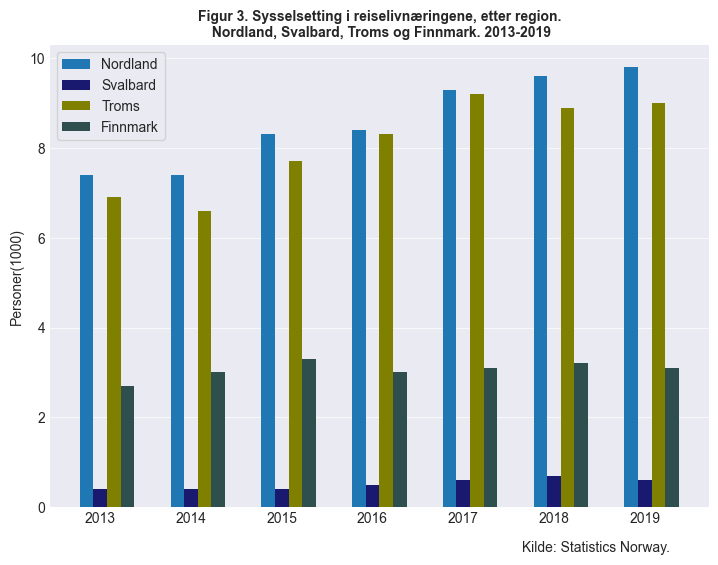

In [15]:
fig, ax1 = plt.subplots(figsize=(8.5, 6))

# Fixing the width of the bars
width=0.15

# shift the bars to the left by the width of the bar to separate them
x1 = np.arange(len(pivot['år']))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]

# Plotting the bars
ax1.bar(x1, pivot['Nordland'], width=width, label='Nordland', color='#1f77b4')
ax1.bar(x2, pivot['Svalbard'], width=width, label='Svalbard', color='midnightblue')
ax1.bar(x3, pivot['Troms'], width=width, label='Troms', color='olive')
ax1.bar(x4, pivot['Finnmark'], width=width, label='Finnmark', color='darkslategrey')

# set the x-tick positions to the middle of the bars
ax1.set_xticks(x2)

# Set the x-tick labels to the year
ax1.set_xticklabels(pivot['år'].astype("string"))

#Setting the title
ax1.set_title('Figur 3. Sysselsetting i reiselivnæringene, etter region.\n Nordland, Svalbard, Troms og Finnmark. 2013-2019', fontsize=10, fontweight='bold')

# Source
ax1.text(x=4.8, y=-1, s='Kilde: Statistics Norway.', fontsize=10)

# Setting the y-label
ax1.set_ylabel('Personer(1000)', fontsize=10)

# Setting grid and legend
ax1.grid(axis='y', alpha=0.7)
ax1.legend(loc='best', frameon=True);

Turisme sysselsetter mange mennesker i Nord-Norge og Svalbard (Se figur 3.). I 2013 var det 6900 personer som var sysselsatt innenfor turisme i Troms fylke, mens i 2019 var det 9000 personer. Dette er en økning på 2100 personer fra 2013. I 2019 var det totalt 22 500 personer som var sysselsatt innenfor turisme i Nord-Norge inkl. Svalbard.


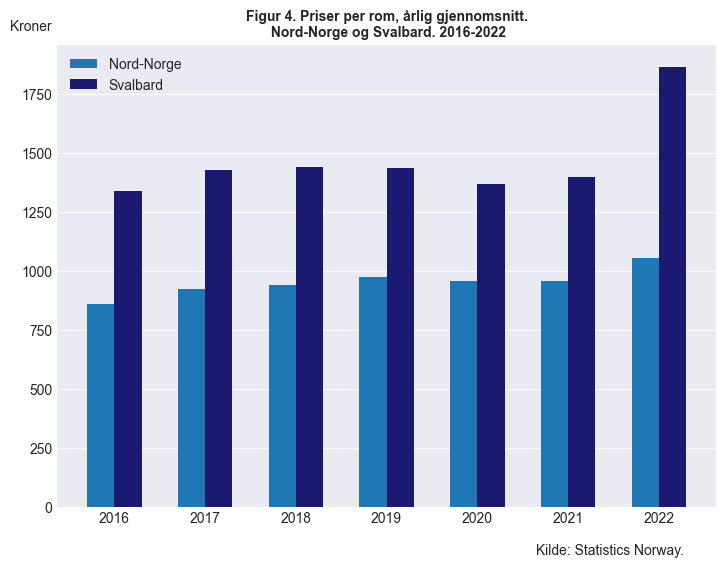

In [16]:
fig, ax = plt.subplots(figsize=(8.5, 6))

#Fixing the width of the bars
width = 0.3

# np.arange to create the x-axis years
x_p = np.arange(len(nord_norge_df2['year']))

# For loop to create the x-axis years for the second bar
x_d = [x + width for x in x_p]

# Plotting first bar, have to use .astype string to convert the date to string so it doesnt give decimals in year
ax.bar(x_p,nord_norge_df2['value'], width=width, label='Nord-Norge', color='#1f77b4') # have to put width=width to make sure the bars are next to each other

# Plot the second bar
ax.bar(x_d, svalbard_df2['value'], width=width, label='Svalbard', color='midnightblue')

# Calculating the position of the tick labels to make the plot centered
ticks_pos = x_p + width/2

# Setting the x_ticks to the position of the tick labels
ax.set_xticks(ticks_pos)

# Setting label for the x_ticks
ax.set_xticklabels(nord_norge_df2['year'].astype("string"))

# Set the title and labels
ax.set_title('Figur 4. Priser per rom, årlig gjennomsnitt.\n Nord-Norge og Svalbard. 2016-2022', fontsize=10, fontweight='bold')

# Fixing the grid
ax.grid(axis='y')

# caption and y-axis label
ax.text(4.8, -200, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(-1, 2020, 'Kroner', fontsize=10)

# legend
ax.legend(loc='upper left');

Ser man på hotelløkonomien i Nord-Norge så har den vært relativt stabil de siste årene. Den gjennomsnittlige hotellromsprisen har ligget på et område mellom 858 til 1054 kroner. Ser man på Svalbard derimot så har hotellromsprisen økt mye fra 2016. I 2016 lå gjennomsnittsprisen på et hotellrom på 1335 kroner, mens i 2022 ligger den på 1863 kroner. Dette er en økning på 71 prosent fra 2016 til 2022.


In [17]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13154/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [18]:
# Fixing the dataset so M is replaced with -
df['måned'] =df['måned'].str.replace('M', '-')

# Making a copy of the dataset
df= df.copy()

# Converting the date to datetime
df['måned'] = pd.to_datetime(df['måned'], format='%Y-%m')

# Setting the date as index
df.set_index('måned', inplace=True)

# Slicing the dataset to get the first year
first_year = df[df.index.year == df.index[0].year]

# Slicing the dataset to get the last year
last_year = df[df.index.year == df.index[-1].year]

# Grouping the first year by month and summing the values
first_year = first_year.groupby(['måned']).sum(numeric_only=True)

# Grouping the last year by month and summing the values
last_year = last_year.groupby(['måned']).sum(numeric_only=True)

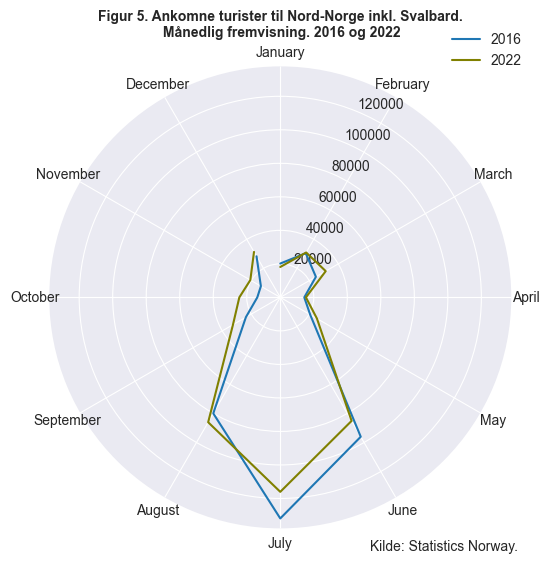

In [19]:
# Starting the polar plot
fig = plt.figure(figsize=(8.5, 6))
ax = fig.add_subplot(111, polar=True)

# Plot the data for the first year
ax.plot((first_year.index.month - 1) / 12 * 2 * np.pi, first_year['value'], label='2016', color = '#1f77b4')

# Plot the data for the last year
ax.plot((last_year.index.month - 1) / 12 * 2 * np.pi, last_year['value'], label='2022', color = 'olive')

# Set the xticks to the number of months.
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))

# Setting the monthly ticks
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Setting the title
ax.set_title('Figur 5. Ankomne turister til Nord-Norge inkl. Svalbard.\n Månedlig fremvisning. 2016 og 2022', fontsize=10, fontweight='bold')

# Setting the location of the zero
ax.set_theta_zero_location('N')

#  Setting the direction of the plot
ax.set_theta_direction(-1)

#Fixing the y-axis
ax.set_yticklabels

# Source
ax.text(x=2.8, y=160000, s='Kilde: Statistics Norway.', fontsize=10)

#  Setting the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1.1), fontsize=10);

I figur 5 kan man se hvilke tider på året turister ankommer Nord-Norge inkl. Svalbard. Vi kan se at det er sommermånedene som er mest populære, i 2016 ankom det ca. 132 000 turister i juli måned mens i 2022 har det vært en liten nedgang til 116 000 ankomne turister.
